## Objective: to identify which customer will buy Insurance. 

### Binaray Classification with LightGBM, Random Forest, Logistic Regression

In this Notebook, two countries are considered - Australia and Malaysia. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn.metrics import precision_recall_curve

In [ ]:
# Function to generate Confusion matrix
def confusion_matrix_custom(act, predict):
  # Compute Confusion matrix
  print("Actual, Predicted Observations:  ",len(act), len(predict))
  anpn = 0
  anpy = 0
  aypn = 0
  aypy = 0
  
  for i in range(len(act)):
      if (act[i]==0 and predict[i]==0):
          anpn = anpn + 1
      elif (act[i]==0 and predict[i]==1):
          anpy = anpy + 1
      elif (act[i]==1 and predict[i]==0):
          aypn = aypn + 1
      else:
          aypy = aypy + 1
  # Confusoin matrix
  print ("--------------------------------------------")
  print ("Confusion Matrix")
  print ("--------------------------------------------")
  print ("              ", "Predicted N", "Predicted Y")
  print ("Actual N      ", anpn,"          ", anpy) 
  print ("Actual Y      ", aypn,"          ", aypy)
  print ("--------------------------------------------")
  print ("Total observations  :  ", anpn+anpy+aypn+aypy)
  print ("False Positives     :  ", anpy)
  print ("False Negatives     :  ", aypn)
  print ("Overall Accuracy    :  ", round((float(anpn+aypy)/float(anpn+anpy+aypn+aypy))*100, 2), "%")
  print ("Sensitivity/Recall  :  ", round((float(aypy)/float(aypn+aypy))*100, 2), "%")
  print ("Specificity         :  ", round((float(anpn)/float(anpn+anpy))*100, 2), "%")
  print ("Precision           :  ", round((float(aypy)/float(anpy+aypy))*100, 2), "%")
  print ("--------------------------------------------")

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
cd ../gdrive/My Drive/Colab Notebooks/_Location Intelligence

In [ ]:
data = pd.read_csv("Classification with FlightRoute of SpiceJet/AncillaryScoring_insurance.csv",encoding='latin-1')

### EDA & Preprocessing (Australia)

In [ ]:
data = data[data['geoNetwork_country'].isin(['Australia', 'Malaysia'])]

In [ ]:
data_classA = data[data['INS_FLAG'] == 0]
data_classB = data[data['INS_FLAG'] == 1]

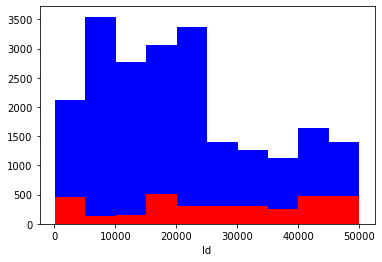

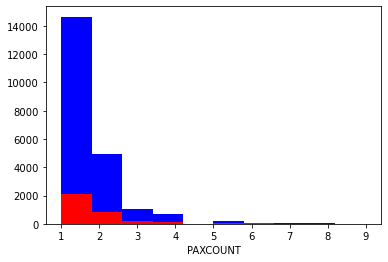

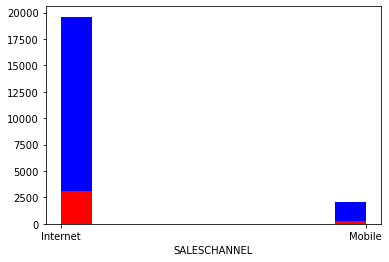

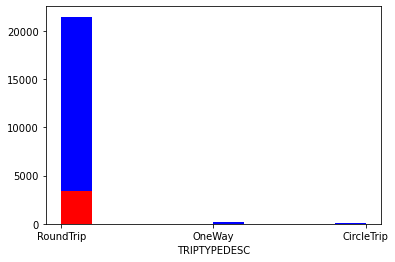

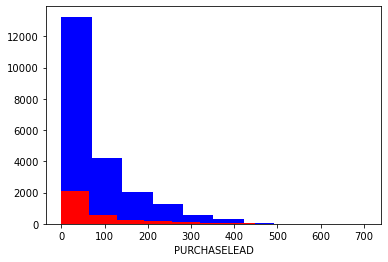

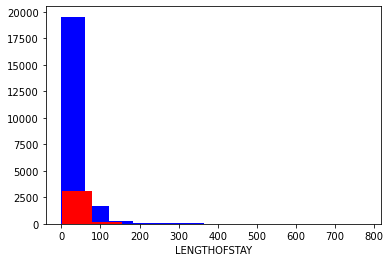

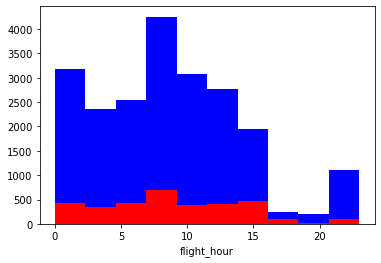

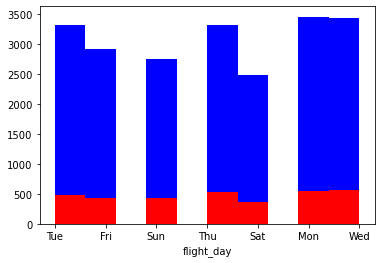

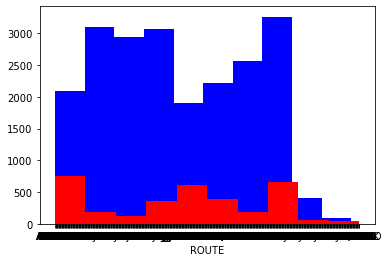

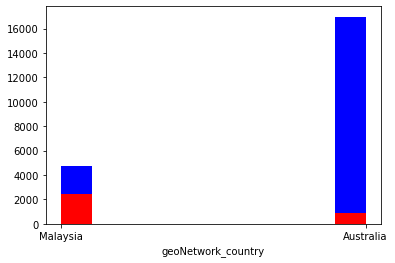

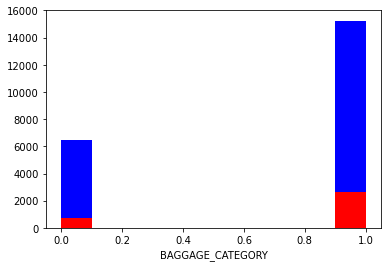

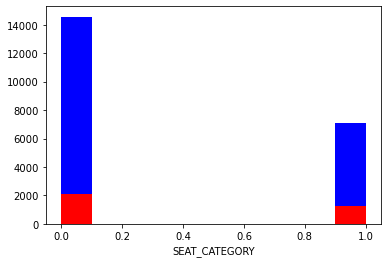

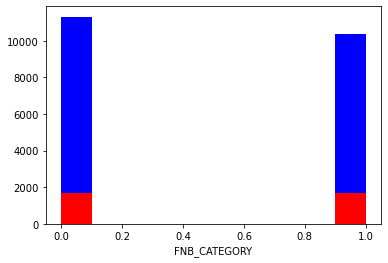

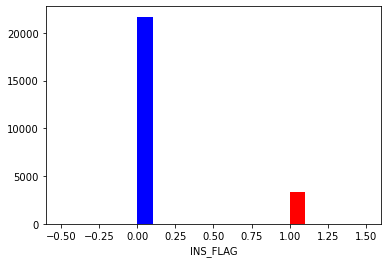

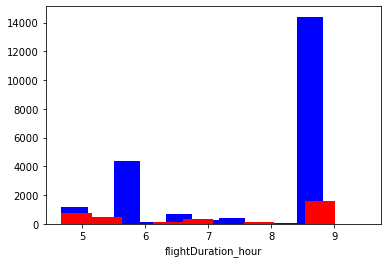

In [ ]:
# Visualizing the relation between numerical variables and target variable
cols = data.columns
for i in cols:
    plt.hist(data_classA[i],color='blue')
    plt.hist(data_classB[i], color='red')
    plt.xlabel(i)
    plt.show()

In [ ]:
# Removing ID column 
len(data['Id'].unique()) # 50000 , which is equal to the number of rows, this may be dropped

data.drop(['Id'], axis=1,inplace=True)
data.shape

(25046, 14)

In [ ]:
# No. of Unique Values.
for i in data.columns:
    print("{}:{}".format(i,len(data[i].unique())))

PAXCOUNT:9
SALESCHANNEL:2
TRIPTYPEDESC:3
PURCHASELEAD:450
LENGTHOFSTAY:292
flight_hour:24
flight_day:7
ROUTE:503
geoNetwork_country:2
BAGGAGE_CATEGORY:2
SEAT_CATEGORY:2
FNB_CATEGORY:2
INS_FLAG:2
flightDuration_hour:21


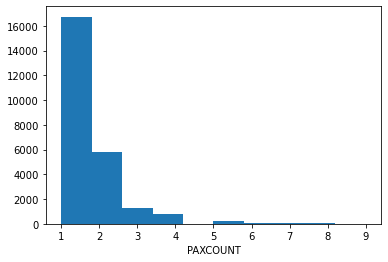

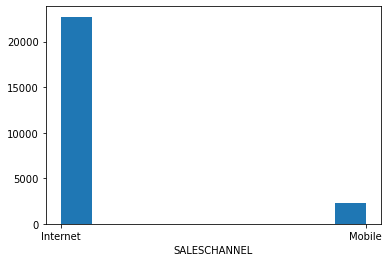

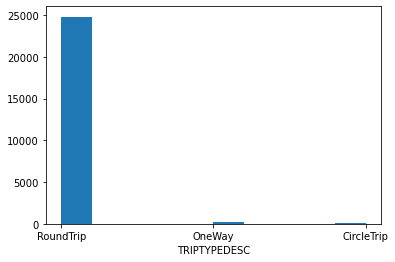

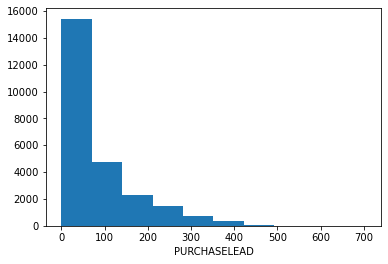

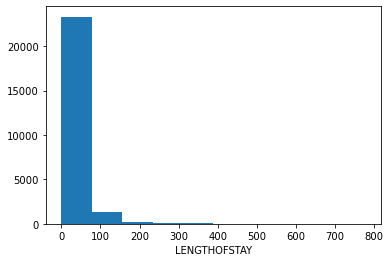

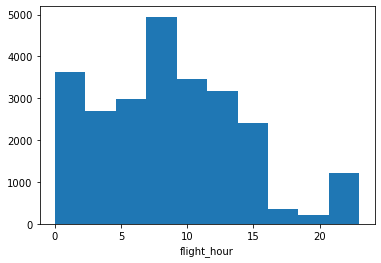

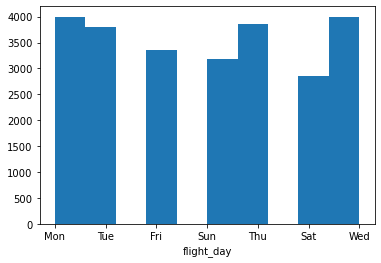

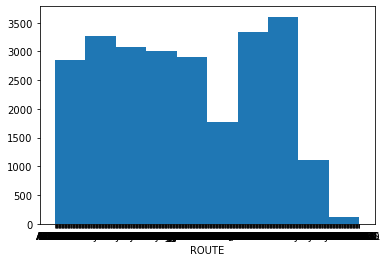

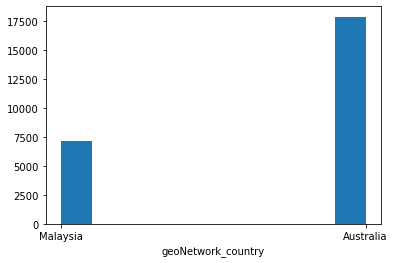

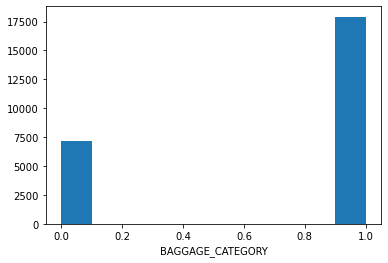

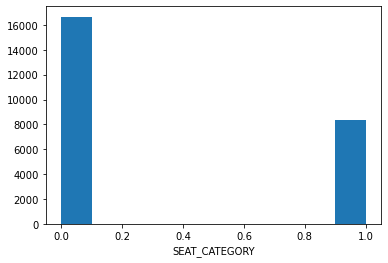

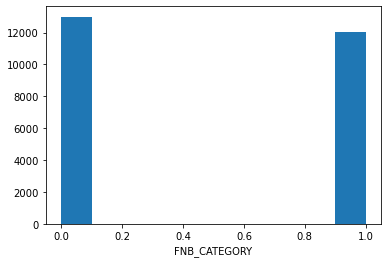

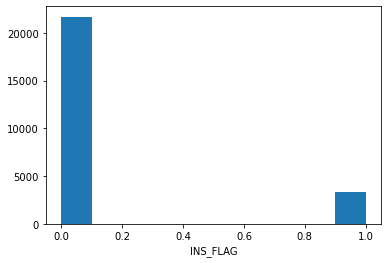

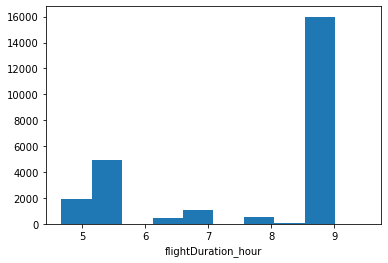

In [ ]:
# Histograms
for i in data.columns:
    plt.hist(data[i])
    plt.xlabel(i)
    plt.show()

<AxesSubplot:>

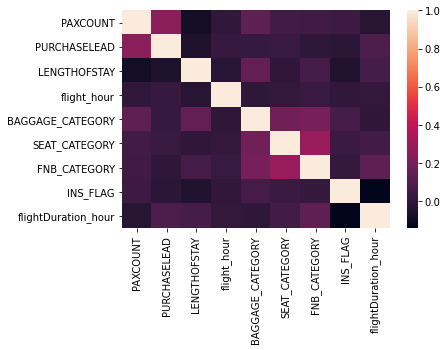

In [ ]:
# Correlation Matrix
sns.heatmap(data.corr())

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

string_cols = ['SALESCHANNEL','TRIPTYPEDESC','flight_day','ROUTE','geoNetwork_country']

for i in string_cols:
    le.fit(data[i])
    data[i] = le.transform(data[i])
    
data.head(3)

,PAXCOUNT,SALESCHANNEL,TRIPTYPEDESC,PURCHASELEAD,LENGTHOFSTAY,flight_hour,flight_day,ROUTE,geoNetwork_country,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY,INS_FLAG,flightDuration_hour
82,1,0,2,15,31,17,1,0,1,0,0,0,1,8.83
83,1,0,2,31,274,10,5,0,1,1,0,0,0,8.83
84,1,0,2,316,35,16,5,0,1,1,0,0,0,8.83


In [ ]:
# Checking the No. of Unique Values Again.
for i in data.columns:
    print("{}:{}".format(i,len(data[i].unique())))

PAXCOUNT:9
SALESCHANNEL:2
TRIPTYPEDESC:3
PURCHASELEAD:450
LENGTHOFSTAY:292
flight_hour:24
flight_day:7
ROUTE:503
geoNetwork_country:2
BAGGAGE_CATEGORY:2
SEAT_CATEGORY:2
FNB_CATEGORY:2
INS_FLAG:2
flightDuration_hour:21


In [ ]:
num_cols = list(data.columns)

for i in string_cols:
    num_cols.remove(i)
    
num_cols.remove('INS_FLAG')

### Train & Test Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(['INS_FLAG', 'geoNetwork_country'], axis=1)
y = data['INS_FLAG']

In [ ]:
X.columns

Index(['PAXCOUNT', 'SALESCHANNEL', 'TRIPTYPEDESC', 'PURCHASELEAD',
       'LENGTHOFSTAY', 'flight_hour', 'flight_day', 'ROUTE',
       'BAGGAGE_CATEGORY', 'SEAT_CATEGORY', 'FNB_CATEGORY',
       'flightDuration_hour'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## LightGBM 

In [ ]:
from lightgbm import LGBMClassifier

#### Prediction

In [ ]:
clf = LGBMClassifier(is_unbalance = True).fit(X_train.values,y_train)
predictions = clf.predict(X_test)

#### Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, predictions))
print("="*60)
print(classification_report(y_test, predictions))
print("F1 Score : {}".format(f1_score(y_test,predictions)))

[[3346  984]
 [ 203  477]]
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      4330
           1       0.33      0.70      0.45       680

    accuracy                           0.76      5010
   macro avg       0.63      0.74      0.65      5010
weighted avg       0.86      0.76      0.79      5010

F1 Score : 0.4455861746847268


In [ ]:
act = y_test.values
predict = predictions
confusion_matrix_custom(act, predict)

Actual, Predicted Observations:   5010 5010
--------------------------------------------
Confusion Matrix
--------------------------------------------
               Predicted N Predicted Y
Actual N       3346            984
Actual Y       203            477
--------------------------------------------
Total observations  :   5010
False Positives     :   984
False Negatives     :   203
Overall Accuracy    :   76.31 %
Sensitivity/Recall  :   70.15 %
Specificity         :   77.27 %
Precision           :   32.65 %
--------------------------------------------


#### RoC and AUC

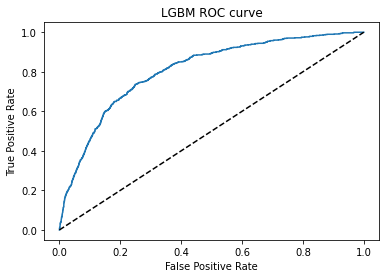

The AUC ROC Score is 0.7371094280668388


In [ ]:
probs = clf.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LGBM ROC curve')
# show the plot
plt.show()

print("The AUC ROC Score is {}".format(roc_auc_score(y_test, predictions)))

#### Feature importance

Feature: 0, Score: 83.00000
Feature: 1, Score: 45.00000
Feature: 2, Score: 11.00000
Feature: 3, Score: 651.00000
Feature: 4, Score: 473.00000
Feature: 5, Score: 345.00000
Feature: 6, Score: 170.00000
Feature: 7, Score: 831.00000
Feature: 8, Score: 52.00000
Feature: 9, Score: 69.00000
Feature: 10, Score: 66.00000
Feature: 11, Score: 204.00000


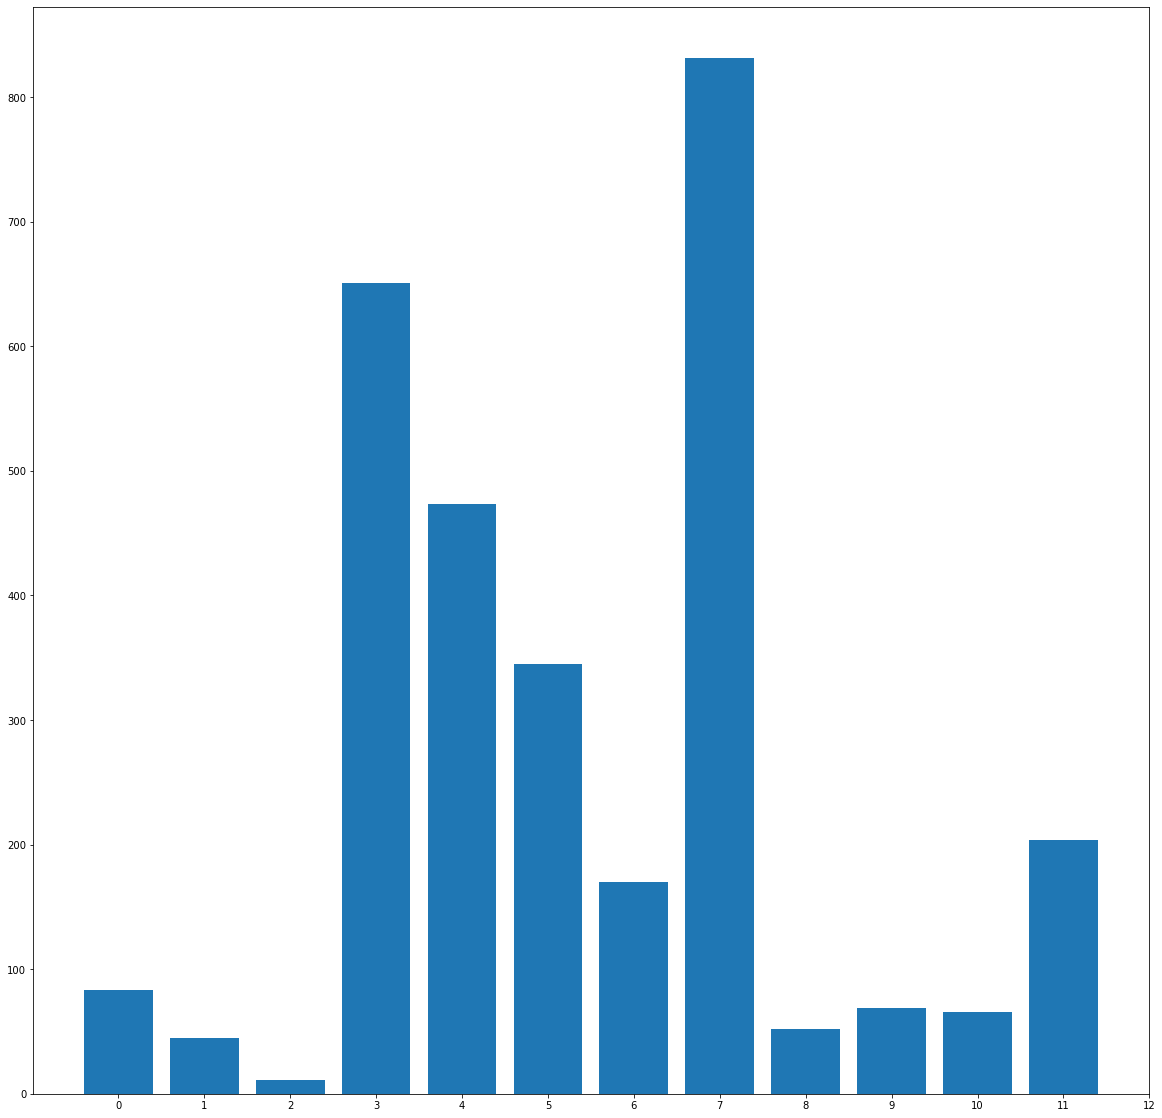

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
figure(figsize=(20, 20))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(list(range(0,13)))
plt.show()
# # 3,4,5,7,8,12

In [ ]:
X.columns

Index(['PAXCOUNT', 'SALESCHANNEL', 'TRIPTYPEDESC', 'PURCHASELEAD',
       'LENGTHOFSTAY', 'flight_hour', 'flight_day', 'ROUTE',
       'BAGGAGE_CATEGORY', 'SEAT_CATEGORY', 'FNB_CATEGORY',
       'flightDuration_hour'],
      dtype='object')

## Random Forest Classifier

#### Oversampling with SMOTE

In [ ]:
# import the SMOTETomek
from imblearn.over_sampling import SMOTE

# create the  object with the desired sampling strategy.
smote = SMOTE(sampling_strategy='minority')

# fit the object to our training data
X_train_smote, Y_train_smote = smote.fit_sample(X_train, y_train)

In [ ]:
from collections import Counter
counter = Counter(Y_train_smote)
print(counter)

Counter({0: 17348, 1: 17348})


In [ ]:
clf_rfc = RandomForestClassifier().fit(X_train_smote,Y_train_smote)
predictions_rfc = clf_rfc.predict(X_test.values)

In [ ]:
print(confusion_matrix(y_test, predictions_rfc))
print("="*60)
print(classification_report(y_test, predictions_rfc))

print("F1 Score : {}".format(f1_score(y_test,predictions_rfc)))
# plot roc auc

[[3887  443]
 [ 406  274]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4330
           1       0.38      0.40      0.39       680

    accuracy                           0.83      5010
   macro avg       0.64      0.65      0.65      5010
weighted avg       0.83      0.83      0.83      5010

F1 Score : 0.39226914817465997


In [ ]:
act = y_test.values
predict = predictions_rfc
confusion_matrix_custom(act, predict)

Actual, Predicted Observations:   5010 5010
--------------------------------------------
Confusion Matrix
--------------------------------------------
               Predicted N Predicted Y
Actual N       3887            443
Actual Y       406            274
--------------------------------------------
Total observations  :   5010
False Positives     :   443
False Negatives     :   406
Overall Accuracy    :   83.05 %
Sensitivity/Recall  :   40.29 %
Specificity         :   89.77 %
Precision           :   38.21 %
--------------------------------------------


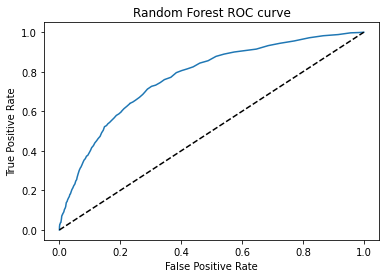

The AUC ROC Score is 0.6503158538242086


In [ ]:
probs = clf_rfc.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 

plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')

# show the plot
plt.show()
print("The AUC ROC Score is {}".format(roc_auc_score(y_test, predictions_rfc)))

Feature: 0, Score: 0.03033
Feature: 1, Score: 0.02511
Feature: 2, Score: 0.00251
Feature: 3, Score: 0.14743
Feature: 4, Score: 0.15534
Feature: 5, Score: 0.09962
Feature: 6, Score: 0.07086
Feature: 7, Score: 0.19652
Feature: 8, Score: 0.01630
Feature: 9, Score: 0.01846
Feature: 10, Score: 0.02236
Feature: 11, Score: 0.21516


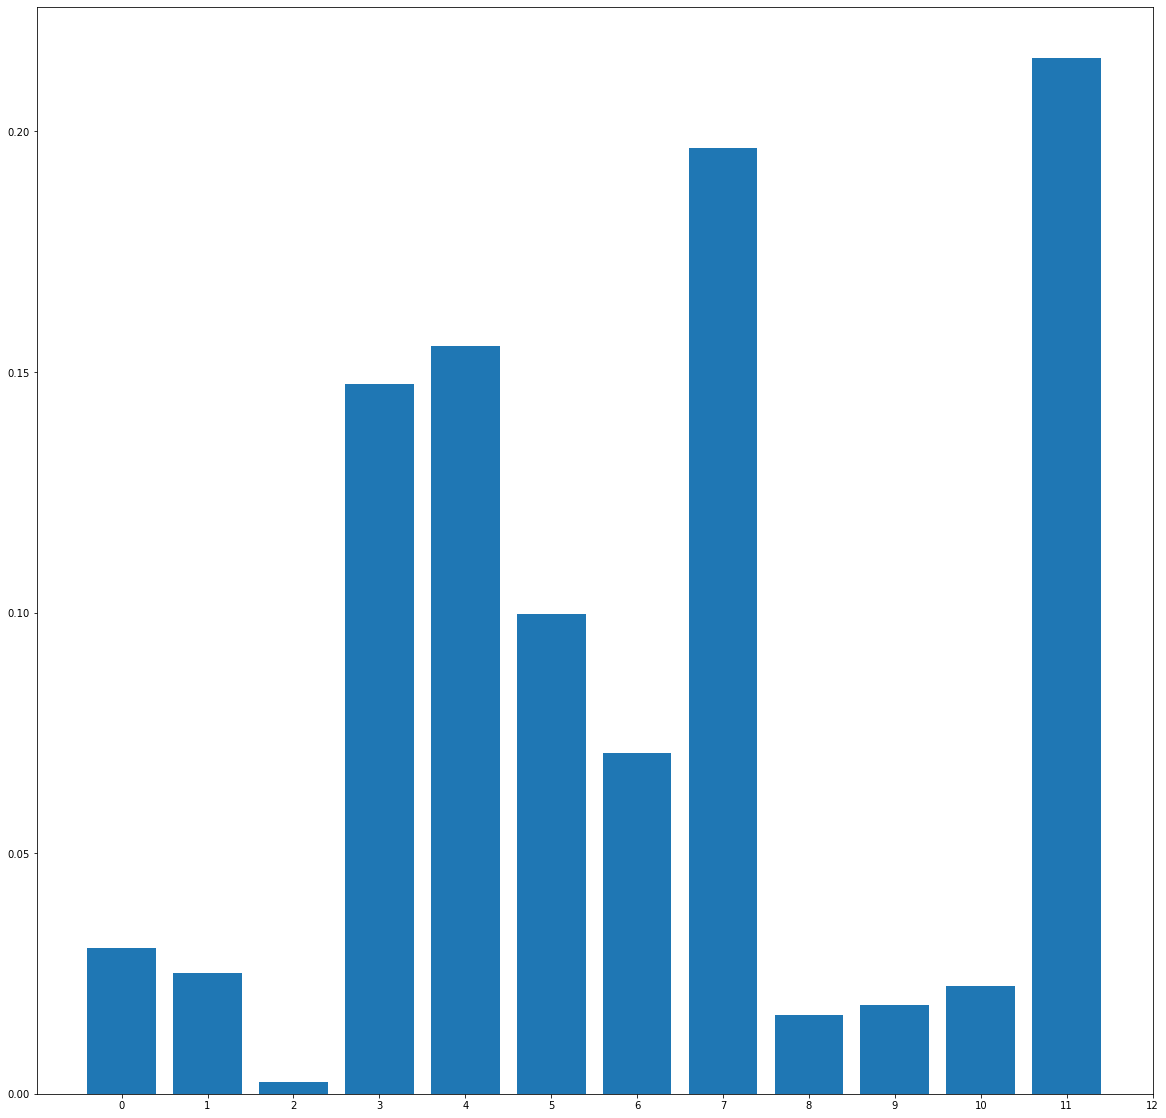

In [ ]:
importance = clf_rfc.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
figure(figsize=(20, 20))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(list(range(0,13)))
plt.show()

### Logistic Regression

In [ ]:
clf_lr = LogisticRegression(solver='saga').fit(X_train_smote,Y_train_smote) # solver
predictions_lr = clf_lr.predict(X_test.values)

C:\Users\Ishan Jain\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
print(confusion_matrix(y_test, predictions_lr))
print("="*60)
print(classification_report(y_test, predictions_lr))
print("F1 Score : {}".format(f1_score(y_test,predictions_lr)))
# plot roc auc

[[2941 1389]
 [ 384  296]]
              precision    recall  f1-score   support

           0       0.88      0.68      0.77      4330
           1       0.18      0.44      0.25       680

    accuracy                           0.65      5010
   macro avg       0.53      0.56      0.51      5010
weighted avg       0.79      0.65      0.70      5010

F1 Score : 0.25031712473572937


In [ ]:
act = y_test.values
predict = predictions_lr
confusion_matrix_custom(act, predict)

Actual, Predicted Observations:   5010 5010
--------------------------------------------
Confusion Matrix
--------------------------------------------
               Predicted N Predicted Y
Actual N       2941            1389
Actual Y       384            296
--------------------------------------------
Total observations  :   5010
False Positives     :   1389
False Negatives     :   384
Overall Accuracy    :   64.61 %
Sensitivity/Recall  :   43.53 %
Specificity         :   67.92 %
Precision           :   17.57 %
--------------------------------------------


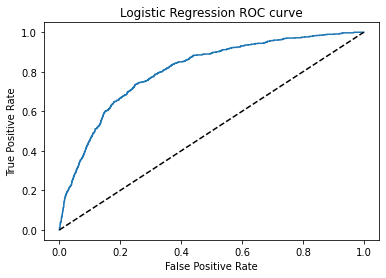

The AUC ROC Score is 0.5572544491237604


In [ ]:
probs = clf.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
# show the plot
plt.show()

print("The AUC ROC Score is {}".format(roc_auc_score(y_test, predictions_lr)))

# Summary